In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

定义数据类

In [2]:
class Dataset:
    def __init__(self, mode='random', means1=[-5,0], means2=[0,5]):
        if mode == 'random':
            self._random_sample(means1, means2)

    def _random_sample(self, means1, means2):
        means1, means2 = np.array(means1), np.array(means2)
        covar = np.array([1,0,0,1]).reshape(2,2)
        x1, y1 = np.random.multivariate_normal(means1, covar, size=200), np.ones((200, 1))
        x2, y2 = np.random.multivariate_normal(means2, covar, size=200), np.ones((200, 1)) * -1
        self._split(x1, y1, x2, y2)

    def _split(self, x1, y1, x2, y2):
        train_n1, train_n2 = int(x1.shape[0] * 0.8), int(x2.shape[0] * 0.8)
        self.x_train = np.concatenate((x1[:train_n1], x2[:train_n2]), axis=0)
        self.y_train = np.concatenate((y1[:train_n1], y2[:train_n2]), axis=0)
        self.x_test = np.concatenate((x1[train_n1:], x2[train_n2:]), axis=0)
        self.y_test = np.concatenate((y1[train_n1:], y2[train_n2:]), axis=0)

定义logistics回归模型 **<font color="Red">（问题1）</font>**

In [3]:
class LogisticRegression:
    def __init__(self, lr=0.02, epoch=50):
        self.w = np.zeros((3,1))
        self.lr = lr
        self.epoch = epoch

    def __call__(self, x, y):
        x, y = x.reshape(-1,2), y.reshape(-1,1)
        expand_axis = np.ones((x.shape[0],1))
        x = np.concatenate((expand_axis, x), axis=-1)

        losses = []
        for i in range(self.epoch):
            yhat = self.sigmoid(np.matmul(x, self.w))
            loss = self.cross_entropy(x, y, yhat)
            losses.append(loss)
            grad = self._calculate_grad(x, y, yhat)
        
            self.w -= self.lr * grad
            print('epoch: %i/%i loss: %.2f'%(i+1, self.epoch, loss))

        return yhat, losses

    def _calculate_grad(self, x, y, yhat):
        batchsize = y.shape[0]
        s = np.matmul(x, self.w)
        grad = (self.sigmoid(-y*s) - 1) * y * x
        grad = np.sum(grad, axis=0) / batchsize
        return grad.reshape(3,1)

    def cross_entropy(self,x, y, yhat):
        num = y.shape[0]
        s = np.matmul(x, self.w)
        loss = (1/num)*np.sum(np.log(1 +np.exp(-s*y)))
        return loss

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def eval(self, x, y):
        test_num = x.shape[0]
        expand_axis = np.ones((x.shape[0],1))
        x = np.concatenate((expand_axis, x), axis=-1)
        yhat = np.matmul(x, self.w)
        yhat = np.sign(self.sigmoid(yhat) - 0.5)
        assert(len(yhat) == len(y))
        correct_num = len(np.where(yhat == y)[0])
        print('accuracy: %.2f'%(correct_num/test_num))

生成随机点数据并可视化

Size of Dataset: 
x_train: (320, 2)
y_train: (320, 1)
x_test: (80, 2)
y_test: (80, 1)


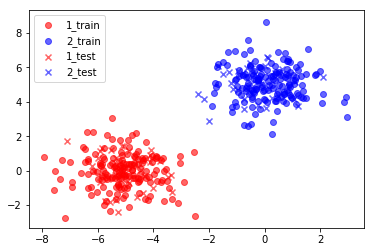

In [4]:
data = Dataset(mode='random')
x_train, x_test = data.x_train, data.x_test
y_train, y_test = data.y_train, data.y_test
print('Size of Dataset: ')
print("x_train: {}".format(x_train.shape))
print("y_train: {}".format(y_train.shape))
print("x_test: {}".format(x_test.shape))
print("y_test: {}".format(y_test.shape))
c1 = plt.scatter(x_train[:160,0], x_train[:160,1], alpha=0.6, marker='o', c='red')
c2 = plt.scatter(x_train[160:,0], x_train[160:,1], alpha=0.6, marker='o', c='blue')
c3 = plt.scatter(x_test[:40,0], x_test[:40,1], alpha=0.6, marker='x', c='red')
c4 = plt.scatter(x_test[40:,0], x_test[40:,1], alpha=0.6, marker='x', c='blue')
plt.legend(handles=[c1, c2, c3, c4],labels=['1_train','2_train', '1_test', '2_test'],loc='best')
plt.show()

训练两个模型，统计准确率、运行时间和数据可视化。 **<font color="Red">（问题2）</font>**

epoch: 1/50 loss: 0.69
epoch: 2/50 loss: 0.66
epoch: 3/50 loss: 0.63
epoch: 4/50 loss: 0.60
epoch: 5/50 loss: 0.56
epoch: 6/50 loss: 0.53
epoch: 7/50 loss: 0.50
epoch: 8/50 loss: 0.47
epoch: 9/50 loss: 0.44
epoch: 10/50 loss: 0.41
epoch: 11/50 loss: 0.38
epoch: 12/50 loss: 0.35
epoch: 13/50 loss: 0.33
epoch: 14/50 loss: 0.30
epoch: 15/50 loss: 0.28
epoch: 16/50 loss: 0.26
epoch: 17/50 loss: 0.24
epoch: 18/50 loss: 0.22
epoch: 19/50 loss: 0.20
epoch: 20/50 loss: 0.18
epoch: 21/50 loss: 0.16
epoch: 22/50 loss: 0.15
epoch: 23/50 loss: 0.14
epoch: 24/50 loss: 0.12
epoch: 25/50 loss: 0.11
epoch: 26/50 loss: 0.10
epoch: 27/50 loss: 0.09
epoch: 28/50 loss: 0.08
epoch: 29/50 loss: 0.08
epoch: 30/50 loss: 0.07
epoch: 31/50 loss: 0.06
epoch: 32/50 loss: 0.06
epoch: 33/50 loss: 0.05
epoch: 34/50 loss: 0.05
epoch: 35/50 loss: 0.04
epoch: 36/50 loss: 0.04
epoch: 37/50 loss: 0.03
epoch: 38/50 loss: 0.03
epoch: 39/50 loss: 0.03
epoch: 40/50 loss: 0.03
epoch: 41/50 loss: 0.02
epoch: 42/50 loss: 0.02
e

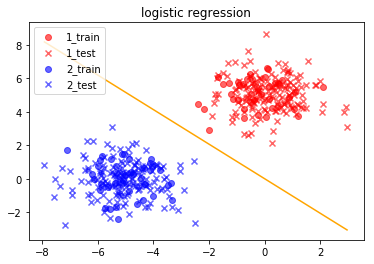

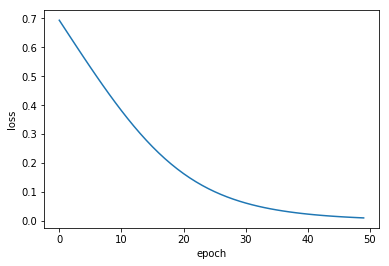

accuracy: 1.00


In [5]:
epoch, lr = 50, 0.01
model = LogisticRegression(lr=lr, epoch=epoch)

yhat, loss = model(x_train, y_train)
w, b = model.w[1:], model.w[0]
print('w: {}'.format(w))
print('b: {}'.format(b))
plt.scatter(x_train[:160,0], x_train[:160,1], alpha=0.6, marker='x', c='blue')
plt.scatter(x_train[160:,0], x_train[160:,1], alpha=0.6, marker='x', c='red')
plt.scatter(x_test[:40,0], x_test[:40,1], alpha=0.6, marker='o', c='blue')
plt.scatter(x_test[40:,0], x_test[40:,1], alpha=0.6, marker='o', c='red')

xmax, xmin = np.max(x_train[:, 0]), np.min(x_train[:, 0])
point1, point2 = [xmin, xmax], [- ( w[0] * xmin + b) / w[1],-(w[0] * xmax + b) / w[1]]
plt.plot(point1, point2, c='orange')
plt.legend(handles=[c1, c3, c2, c4],labels=['1_train','1_test','2_train','2_test'], loc='best')
plt.title('logistic regression')
plt.show()

epochs = np.arange(0,epoch)
loss = np.array(loss)
plt.plot(epochs,loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

model.eval(x_test, y_test)